In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# 读取数据
data_path = 'bike.csv'
data = pd.read_csv(data_path)

# 1. 剔除id列
data = data.drop(columns=['id'])

# 2. 筛选出上海市数据，并剔除city列
data_shanghai = data[data['city'] == 1].drop(columns=['city'])

# 3. 将hour列简化为二分类
data_shanghai['hour'] = data_shanghai['hour'].apply(lambda x: 1 if 6 <= x <= 18 else 0)

# 4. 提取标签y列，并转换为numpy列向量
y = data_shanghai['y'].to_numpy().reshape(-1, 1)  # 转换为列向量
data_shanghai = data_shanghai.drop(columns=['y'])  # 剔除y列

# 5. 将DataFrame转换为numpy数组
X = data_shanghai.to_numpy()

# 6. 划分训练集和测试集（8:2）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 数据归一化
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# 8. 线性回归模型训练
model = LinearRegression()
model.fit(X_train, y_train)

# 9. 模型评估
y_pred = model.predict(X_test)
rmse = math.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred)))
print(f"模型的均方根误差（RMSE）：{rmse:.2f}")


模型的均方根误差（RMSE）：31.57


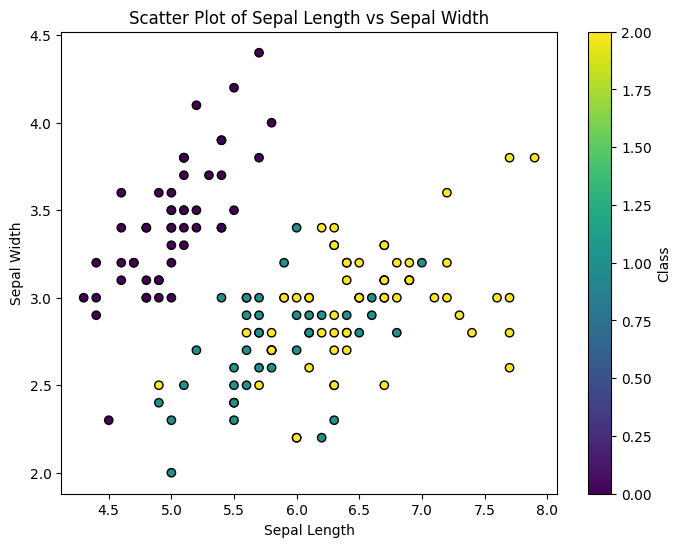

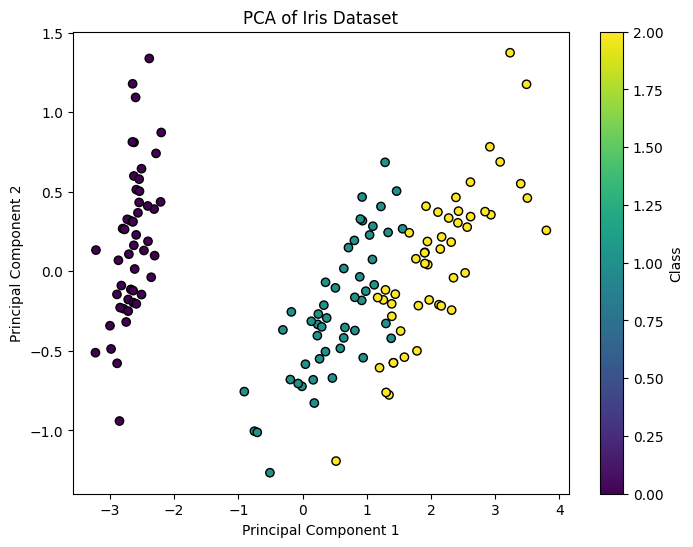

KNN分类器的测试准确率: 1.00


In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target

# 2. 划分数据集，训练集比例为0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 绘制花萼长度和花萼宽度的散点图
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.colorbar(label='Class')
plt.show()

# 4. PCA降维至2维并可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

# 5. 训练KNN分类器，K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 6. 测试集上进行预测
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN分类器的测试准确率: {accuracy:.2f}')
